# Transmission Lines and SWR
In this notebook, some facts about Standing Wave Ratio (SWR) are illustrated using `scikit-rf`. 

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import skrf as rf

In [3]:
rf.stylely()

C:\Users\JH218595\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\style\core.py:112: UserWarning: Style includes a parameter, 'interactive', that is not related to style.  Ignoring
  _apply_style(rc)


## How does the SWR vary along a line?
Let's assume a 10 MHz source powering an antenna (of load $Z_L$) through a transmission line of length $L$. Depending on the location of the SWR-meter, what does one would read?

![](Impedance_matching_4.svg)


In [4]:
freq = rf.Frequency(10, unit='MHz', npoints=1)

### Lossless lines
Let's start with a lossless line of propagation constant $\gamma=j\beta$ and characteristic impedance $z_0=50\Omega$ (real). 

In [5]:
# load and line properties
Z_L = 75  # Ohm
Z_0 = 50  # Ohm
L = 50  # m

# propagation constant
beta = freq.w/rf.c
gamma = 1j*beta

Below we calculate the SWR of the line as a function of $z$ the line length measured from the load ($z=0$ at the load, $z=L$ at the source).  

In [6]:
z = np.linspace(start=L, stop=0, num=301)
SWRs = rf.zl_2_swr(z0=Z_0, zl=rf.zl_2_zin(Z_0, Z_L, gamma*z))

Text(40, 1.575, 'Source')

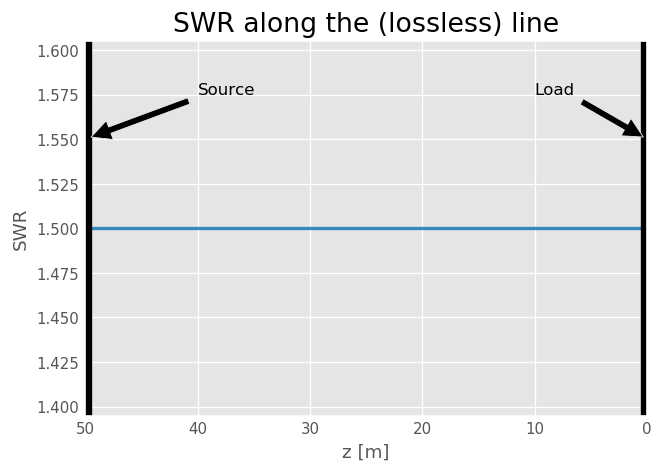

In [7]:
fig, ax = plt.subplots()
ax.plot(z, SWRs, lw=2)
ax.set_xlabel('z [m]')
ax.set_ylabel('SWR')
ax.set_title('SWR along the (lossless) line')
ax.invert_xaxis()
ax.axvline(0, lw=8, color='k')
ax.axvline(L, lw=8, color='k')
ax.annotate('Load', xy=(0, 1.55), xytext=(10, 1.575),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax.annotate('Source', xy=(50, 1.55), xytext=(40, 1.575),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

As expected, the SWR is the same everywhere along the line as the forward and backward wave amplitudes are also the same along the line.  

### Lossy Lines
Let's take the previous example but on a lossy line. The line is defined with a propagation constant $\gamma=\alpha + j\beta$ :

In [8]:
alpha = 0.01
gamma = alpha + 1j*beta

In [9]:
z = np.linspace(L, 0, num=101)
SWRs = rf.zl_2_swr(z0=Z_0, zl=rf.zl_2_zin(Z_0, Z_L, gamma*z))

Text(40, 1.5, 'Source')

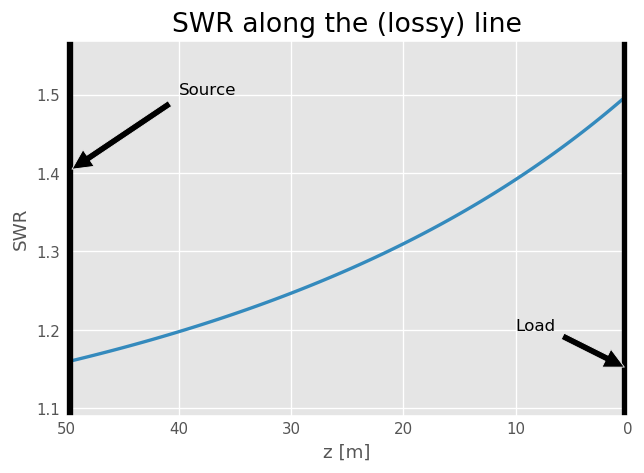

In [10]:
fig, ax = plt.subplots()
ax.plot(z, SWRs, lw=2)
ax.set_xlabel('z [m]')
ax.set_ylabel('SWR')
ax.set_title('SWR along the (lossy) line')
ax.invert_xaxis()
ax.axvline(0, lw=8, color='k')
ax.axvline(L, lw=8, color='k')
ax.annotate('Load', xy=(0, 1.15), xytext=(10, 1.2),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax.annotate('Source', xy=(50, 1.4), xytext=(40, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

This time, the SWR is maximum at the load and decreases to be minimum at the source side. 

C:\Users\JH218595\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


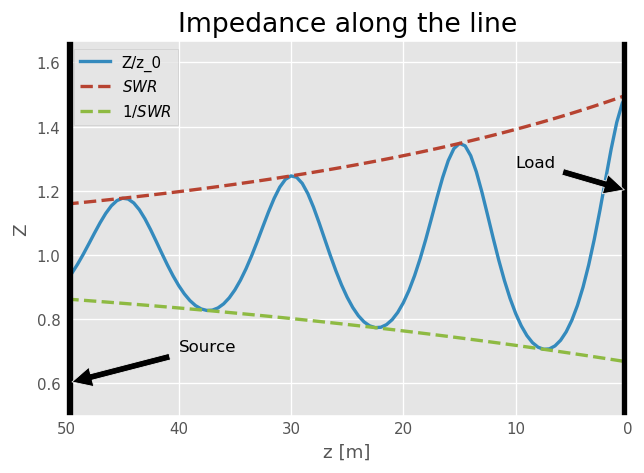

In [11]:

Zins = rf.zl_2_zin(Z_0, Z_L, gamma*z)

fig, ax = plt.subplots()
ax.plot(z, Zins/Z_0, lw=2, label='Z/z_0')
ax.plot(z, SWRs, lw=2, ls='--', label=r'$SWR$')
ax.plot(z, 1/SWRs, lw=2, ls='--', label=r'$1/SWR$')

ax.set_xlabel('z [m]')
ax.set_ylabel('Z')
ax.set_title('Impedance along the line')
ax.invert_xaxis()
ax.axvline(0, lw=8, color='k')
ax.axvline(L, lw=8, color='k')
ax.annotate('Load', xy=(0, 1.2), xytext=(10, 1.275),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax.annotate('Source', xy=(50, 0.6), xytext=(40, 0.7),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax.legend()

This is due to the voltage and current evolution along the transmission line:

In [16]:
V_s = 1
Z_in = rf.zl_2_zin(Z_0, Z_L, gamma*z)
# Z_s = Z_0
V_in = V_s * Z_in/(Z_0 + Z_in)
I_in = V_in/(Z_0 + Z_in)
V, I = rf.voltage_current_propagation(V_in, I_in, Z_0, -gamma*z)

Text(40, 0.005, 'Source')

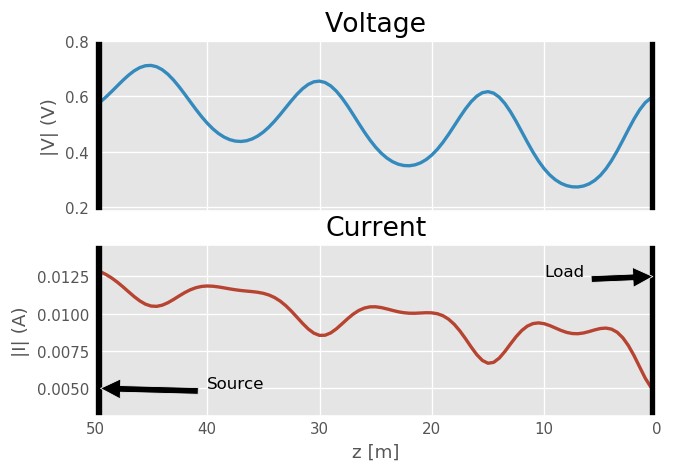

In [29]:
fig, ax = plt.subplots(2,1,sharex=True)
ax[0].plot(z, np.abs(V), lw=2)
ax[1].plot(z, np.abs(I), lw=2, color='C1')
ax[0].invert_xaxis()
ax[1].set_xlabel('z [m]')
ax[0].set_ylabel('|V| (V)')
ax[1].set_ylabel('|I| (A)')
ax[0].set_title('Voltage')
ax[1].set_title('Current')
[a.axvline(0, lw=8, color='k') for a in ax]
[a.axvline(L, lw=8, color='k') for a in ax]
ax[1].annotate('Load', xy=(0, 0.0125), xytext=(10, 0.0125),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax[1].annotate('Source', xy=(50, 0.005), xytext=(40, 0.005),
            arrowprops=dict(facecolor='black', shrink=0.05))

## Addtional Loss Due to SW


TODO

In [ ]:
# SWR at load
SWR_L = np.linspace(1, 20, num=101)

# Matched loss in dB
a = 2


# Total loss in dB

